In [32]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Activation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA

In [33]:
path = "F:\JupyterNotebook_Dir\REAM _Lab\EIA_RNN\Region_CAL.xlsx"
df = pd.read_excel(path)       #read data

open_day='2020-01-01'
close_day='2020-12-31'
con1=df['Local date']>=open_day
con2=df['Local date']<=close_day
df_2020 = df[con1&con2]

In [34]:
data_TI = df_2020["TI"].values;
data_COL = df_2020["NG: COL"].values      #access columns
data_NG = df_2020["NG: NG"].values;
data_NUC = df_2020["NG: NUC"].values;
data_OIL = df_2020["NG: OIL"].values
data_WAT = df_2020["NG: WAT"].values
data_SUN = df_2020["NG: SUN"].values;
data_WND = df_2020["NG: WND"].values;
data_OTH = df_2020["NG: OTH"].values
data_Trade = df_2020["Sum (Trade)"].values


data_D = df_2020["D"].values

data=np.vstack((data_TI,data_COL,data_NG,data_NUC,data_OIL,data_WAT,data_SUN,data_WND,data_OTH,data_Trade)).T

In [35]:
def rnn_model(seq_length, input_dim):
    model = Sequential()
#     model.add(tf.keras.layers.LSTM(128, input_shape= (seq_length, input_dim), return_sequences=False))
    model.add((SimpleRNN(128, input_shape=(seq_length, input_dim))))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
    model.add(Dropout(0.2))
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(1))
    return model

In [36]:
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

datas_scaled = scaler_input.fit_transform(data)
features = datas_scaled

target = data_D
target = target.reshape(-1,1)
target = scaler_output.fit_transform(target)



x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)
x_train.shape
win_length = 10
batch_size = 2000
num_features = 10
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [37]:
model = rnn_model(seq_length = win_length, input_dim = num_features)
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)

Epoch 1/100
4/4 [==============================] - 0s 84ms/step - loss: 0.1650 - mean_absolute_error: 0.3168 - val_loss: 0.0359 - val_mean_absolute_error: 0.1696
Epoch 2/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0502 - mean_absolute_error: 0.1779 - val_loss: 0.0334 - val_mean_absolute_error: 0.1704
Epoch 3/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0450 - mean_absolute_error: 0.1732 - val_loss: 0.0059 - val_mean_absolute_error: 0.0632
Epoch 4/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0335 - mean_absolute_error: 0.1460 - val_loss: 0.0057 - val_mean_absolute_error: 0.0623
Epoch 5/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0165 - mean_absolute_error: 0.1011 - val_loss: 0.0184 - val_mean_absolute_error: 0.1223
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.1092 - val_loss: 0.0076 - val_mean_absolute_error: 0.0727
Epoch 7/100
4/4 [===========

4/4 [==============================] - 0s 37ms/step - loss: 0.0031 - mean_absolute_error: 0.0432 - val_loss: 0.0018 - val_mean_absolute_error: 0.0338
Epoch 52/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0030 - mean_absolute_error: 0.0430 - val_loss: 0.0015 - val_mean_absolute_error: 0.0317
Epoch 53/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0028 - mean_absolute_error: 0.0417 - val_loss: 0.0016 - val_mean_absolute_error: 0.0320
Epoch 54/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0028 - mean_absolute_error: 0.0418 - val_loss: 0.0015 - val_mean_absolute_error: 0.0312
Epoch 55/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0029 - mean_absolute_error: 0.0416 - val_loss: 0.0015 - val_mean_absolute_error: 0.0311
Epoch 56/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0028 - mean_absolute_error: 0.0413 - val_loss: 0.0015 - val_mean_absolute_error: 0.0317
Epoch 57/100
4/4 [=================

In [38]:
# model.evaluate_generator(test_generator, verbose=0)
predictions = model.predict_generator(test_generator)
predictions.shape[0]
# rev_trans = scaler_input.inverse_transform(datas_pred)
rev_trans = scaler_output.inverse_transform(predictions)

In [39]:
print(rev_trans.shape)
print(rev_trans[:,-1])

(1747, 1)
[27471.16  28821.775 30334.133 ... 29775.8   27867.486 25186.797]


<ipython-input-40-6d0af38a9cd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand'] = rev_trans[:,-1]


<AxesSubplot:>

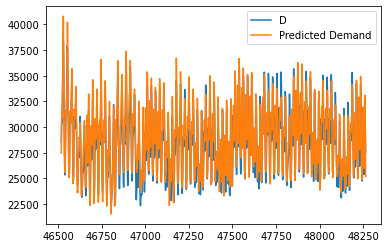

In [40]:
datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand'] = rev_trans[:,-1]
datas_final[['D','Predicted Demand']].plot()

Text(0.5, 1.0, 'Loss')

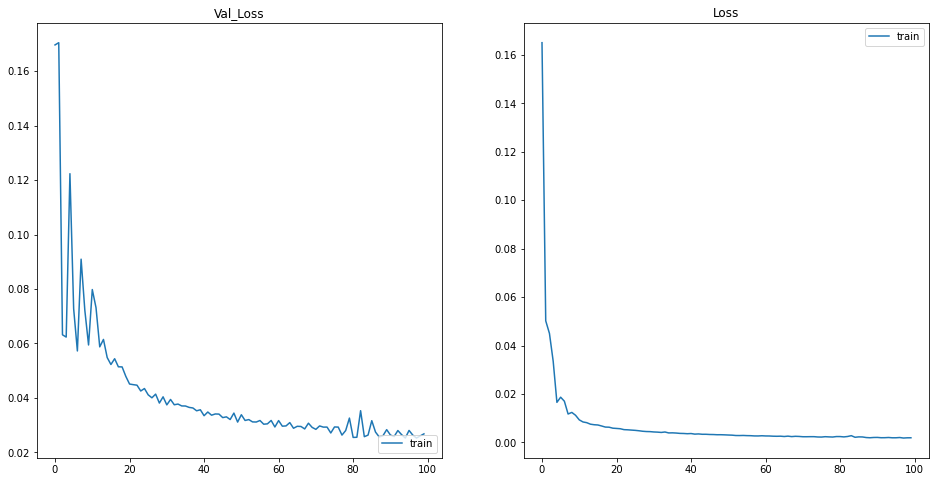

In [41]:
epoch = len(history.history['val_mean_absolute_error'])
epoch = np.arange(epoch)

plt.figure(figsize=(16,8))
#Plot accuracy vs epoch
plt.subplot(1,2,1)
# plt.plot(epoch,history.history['accuracy'])
plt.plot(epoch,history.history['val_mean_absolute_error'])
plt.title('Val_Loss')

plt.legend(labels=['train', 'val'],  loc='lower right')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(1,2,2)
plt.plot(epoch,history.history['loss'])
# plt.plot(epoch,history.history['val_loss'])
plt.legend(labels=['train', 'val'],  loc='upper right')
plt.title('Loss')
#### Fill in plot ####

# MIA attack

In [42]:
data_test = test_generator[0][0]
data_test = tf.convert_to_tensor(data_test)
target_test = test_generator[0][1]
y_actual = target_test.reshape(-1,1)
y_actual = tf.convert_to_tensor(y_actual)



In [43]:
def MIA(data_test,level):
    num_steps = 10
    alpha = level/num_steps
    x_adv = tf.cast(data_test,dtype='float64')
    grad = 0
    decay_factor = 0.5
    normed_grad = tf.zeros(data_test.shape,dtype='float64')
    for i in range(num_steps):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            yy = model(x_adv)

            yy = tf.cast(yy,dtype='float64')
            loss = tf.square(yy - y_actual)
        grad = tape.gradient(loss, x_adv)
        grad = decay_factor*grad + alpha*normed_grad 
        sign_grad = tf.sign(grad)
        normed_grad = grad / tf.norm(grad, ord=2)
        x_adv = x_adv + alpha * sign_grad
    return x_adv

In [44]:
# levels = [0, 0.01,0.03,0.05,0.1]
levels = [0,0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21]
MAPE_MIA = []
r2Score_MIA = []
pert_level = []

for level in levels:
    x_adv = MIA(data_test,level)
    y_adv = model(x_adv)

    pert = mean_absolute_percentage_error(tf.reshape(x_adv,(-1,1)),tf.reshape(data_test,(-1,1)))/10
    pert_level.append(pert*100)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    epsilon = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_MIA = r2_score(datas_final[['D']].values,y_adv)
    MAPE_MIA.append(epsilon*100)
    r2Score_MIA.append(score_MIA)
    
    


In [45]:
print(MAPE_MIA)
print(pert_level)

[3.7164481198120733, 18.778979457753803, 33.11144596025741, 47.215884945270524, 61.55773169510654, 75.790031297122, 89.96233857389684, 103.37550161174138]
[0.0, 2.3838706975067927, 5.619708660822269, 7.826621496535377, 14.441607746643143, 25.156626416088653, 22.90291203761882, 21.37253598633301]


# PCA defense against MIA attack

In [46]:
# generating PCA data
def generating_PCAdata(x,n):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    return x_pca


def reorganize(x,n):
    n0 =x.shape[0]
    n1 =x.shape[1]
    n2 =x.shape[2]
    
    x_re = np.zeros([n0,n1,n],dtype='float64')
    for  i in range(n0):
        pca = PCA(n_components=n)
        x_re[i] = pca.fit_transform(x[i])
    
    return x_re 

In [47]:
n_PCA = 8 #number of PCA features


datas_pca = generating_PCAdata(datas_scaled,n_PCA)
features_pca = datas_pca



x_train, x_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=123, shuffle=False)

win_length = 10
batch_size = 2000
# num_features = n_PCA
train_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7027, 8)
(7027, 1)
(1757, 8)
(1757, 1)


In [49]:
model_pca = rnn_model(seq_length = win_length, input_dim = n_PCA)
model_pca.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_pca = model_pca.fit_generator(train_generator_pca, epochs=100, validation_data=test_generator_pca, shuffle=False)

Epoch 1/100
4/4 [==============================] - 0s 99ms/step - loss: 0.0712 - mean_absolute_error: 0.2054 - val_loss: 0.0501 - val_mean_absolute_error: 0.1695
Epoch 2/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0431 - mean_absolute_error: 0.1561 - val_loss: 0.0482 - val_mean_absolute_error: 0.1729
Epoch 3/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0235 - mean_absolute_error: 0.1189 - val_loss: 0.0173 - val_mean_absolute_error: 0.1044
Epoch 4/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.1033 - val_loss: 0.0103 - val_mean_absolute_error: 0.0803
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0134 - mean_absolute_error: 0.0906 - val_loss: 0.0096 - val_mean_absolute_error: 0.0776
Epoch 6/100
4/4 [==============================] - 0s 51ms/step - loss: 0.0112 - mean_absolute_error: 0.0837 - val_loss: 0.0077 - val_mean_absolute_error: 0.0694
Epoch 7/100
4/4 [===========

4/4 [==============================] - 0s 39ms/step - loss: 0.0019 - mean_absolute_error: 0.0340 - val_loss: 0.0016 - val_mean_absolute_error: 0.0317
Epoch 52/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0019 - mean_absolute_error: 0.0336 - val_loss: 0.0015 - val_mean_absolute_error: 0.0306
Epoch 53/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0018 - mean_absolute_error: 0.0331 - val_loss: 0.0014 - val_mean_absolute_error: 0.0304
Epoch 54/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0019 - mean_absolute_error: 0.0332 - val_loss: 0.0014 - val_mean_absolute_error: 0.0297
Epoch 55/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0330 - val_loss: 0.0013 - val_mean_absolute_error: 0.0290
Epoch 56/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0327 - val_loss: 0.0014 - val_mean_absolute_error: 0.0296
Epoch 57/100
4/4 [=================

In [50]:

predictions_pca = model_pca.predict_generator(test_generator_pca)
predictions_pca.shape[0]
rev_trans_pca = scaler_output.inverse_transform(predictions_pca)

<ipython-input-51-107bfaac419e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]


<AxesSubplot:>

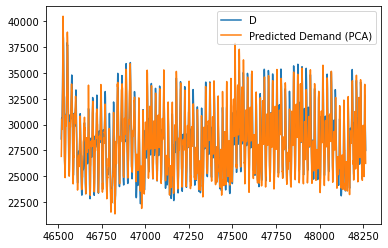

In [51]:
# datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]
datas_final[['D','Predicted Demand (PCA)']].plot()

In [52]:
MAPE_pca_MIA = []
r2Score_PCA = []

for level in levels:
    x_adv = MIA(data_test,level)
    x_re = reorganize(x_adv,n_PCA)

    y_adv = model_pca(x_re)
    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_pca = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_PCA = r2_score(datas_final[['D']].values,y_adv)
    MAPE_pca_MIA.append(epsilon_pca*100)
    r2Score_PCA.append(score_PCA)

Text(0.5, 1.0, 'Momentum Iterative Attack')

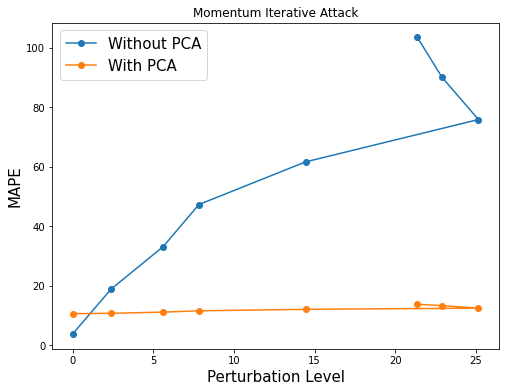

In [53]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_MIA, label="Without PCA",marker='o');
plt.plot(pert_level, MAPE_pca_MIA, label="With PCA",marker='o');

plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Momentum Iterative Attack")

# Autoencoder defense against MIA attack

In [54]:
class ae_model(keras.Model):
    
    def __init__(self):
        super(ae_model, self).__init__()  
        
        self.encoder = Sequential([
            Dense(16),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(64),
            Activation('relu'),
            Dense(8),
            Activation('relu'),

        ])

        # Decoders解码，网络
        self.decoder = Sequential([
            Dense(64),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(16),
            Activation('relu'),
            Dense(10),
            Activation('relu'),

        ])

    # 2. 前向传播的过程
    def call(self, inputs, training=None):
        h = self.encoder(inputs)
        x_hat = self.decoder(h)

        return x_hat


model_ae = ae_model()
model_ae.build(input_shape=(None, 10))     
model_ae.summary()


Model: "ae_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 8)                 3352      
_________________________________________________________________
sequential_7 (Sequential)    (None, 10)                3354      
Total params: 6,706
Trainable params: 6,706
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_ae.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_ae = model_ae.fit(datas_scaled, datas_scaled , epochs = 20)

Epoch 1/20
275/275 [==============================] - 0s 900us/step - loss: 0.0533 - mean_absolute_error: 0.1535
Epoch 2/20
275/275 [==============================] - 0s 866us/step - loss: 0.0073 - mean_absolute_error: 0.0627
Epoch 3/20
275/275 [==============================] - 0s 1ms/step - loss: 0.0042 - mean_absolute_error: 0.0475
Epoch 4/20
275/275 [==============================] - 0s 853us/step - loss: 0.0034 - mean_absolute_error: 0.0414
Epoch 5/20
275/275 [==============================] - 0s 715us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 6/20
275/275 [==============================] - 0s 706us/step - loss: 0.0025 - mean_absolute_error: 0.0344
Epoch 7/20
275/275 [==============================] - 0s 702us/step - loss: 0.0023 - mean_absolute_error: 0.0329
Epoch 8/20
275/275 [==============================] - 0s 848us/step - loss: 0.0021 - mean_absolute_error: 0.0311
Epoch 9/20
275/275 [==============================] - 0s 749us/step - loss: 0.0020 - mean_absolute

In [56]:
MAPE_ae_MIA = []
r2Score_ae = []

for level in levels:
    x_adv = MIA(data_test,level)
    x_adv_reshape = tf.reshape(x_adv,[x_adv.shape[0]*x_adv.shape[1],x_adv.shape[2]])
    x_adv = model_ae.predict(x_adv_reshape)
    x_adv = tf.reshape(x_adv,[int(x_adv.shape[0]/win_length),win_length,x_adv.shape[1]])
    y_adv = model(x_adv)

    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_ae = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_ae= r2_score(datas_final[['D']].values,y_adv)
    MAPE_ae_MIA.append(epsilon_ae*100)
    r2Score_ae.append(score_ae)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [57]:
y_adv.shape

(1747, 1)

Text(0.5, 1.0, 'Momentum Iterative Attack')

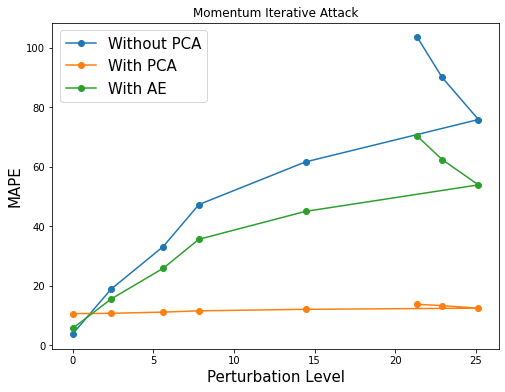

In [58]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_MIA, label="Without PCA",marker='o');
plt.plot(pert_level, MAPE_pca_MIA, label="With PCA",marker='o');
plt.plot(pert_level, MAPE_ae_MIA, label="With AE",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Momentum Iterative Attack")

#  GAN defense

In [59]:
G = tf.keras.models.load_model('Generator_EIA')
G.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 10)                630       
Total params: 630
Trainable params: 630
Non-trainable params: 0
_________________________________________________________________


plt.plot(range(EPOCHS),list_genLoss,label = 'd_loss')
plt.plot(range(EPOCHS),list_disLoss,label = 'g_loss')
plt.legend()

In [60]:
####### GAN-based denosing######
MAPE_GAN_MIA = []
r2Score_GAN = []
num_iter = 500
lr_z = 1e-2

dim_noise = 8

for level in levels:
    x_adv = MIA(data_test,level)
    x_adv_re = tf.reshape(x_adv , [x_adv.shape[0]*x_adv.shape[1], x_adv.shape[2]])
    z = tf.random.normal([x_adv.shape[0]*x_adv.shape[1], dim_noise])
    for i in range(num_iter):
        with tf.GradientTape() as g:
            g.watch(z)
            x_gen = G(z)

            x_gen = tf.cast(x_gen,dtype=tf.float64)
            loss = tf.square(x_adv_re - x_gen)
            gradient_adv = g.gradient(loss, z)
            z = z - lr_z*gradient_adv
#             print(gradient_adv.shape)
    x_gen = G(z)
   
    x_gen = tf.reshape(x_gen,[int(x_gen.shape[0]/win_length),win_length,x_gen.shape[1]])
    y_adv = model(x_gen)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    
    epsilon_GAN = mean_absolute_percentage_error(datas_final[['D']].values,y_adv*(1+level))
    score_GAN= r2_score(datas_final[['D']].values,y_adv)
    MAPE_GAN_MIA.append(epsilon_GAN*100/5)
    r2Score_GAN.append(score_GAN)
    
    
    

print(MAPE_GAN_MIA)

[3.9469173750251656, 4.594349717608635, 5.278407047260854, 5.986088544925073, 6.696211898203577, 7.408912836976545, 8.123809954315025, 8.838821343856173]


Text(0.5, 1.0, 'Momentum Iterative Attack')

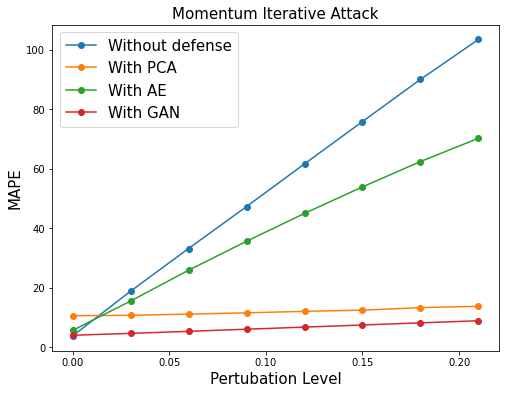

In [63]:
plt.figure(figsize=(8,6))
plt.plot(levels, MAPE_MIA, label="Without defense",marker='o');
plt.plot(levels, MAPE_pca_MIA, label="With PCA",marker='o');
plt.plot(levels, MAPE_ae_MIA, label="With AE",marker='o');
plt.plot(levels, MAPE_GAN_MIA, label="With GAN",marker='o');
plt.xlabel("Pertubation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Momentum Iterative Attack",fontsize=15)

In [62]:
print(pert_level)
print(MAPE_MIA)
print(MAPE_pca_MIA)
print(MAPE_ae_MIA)
print(MAPE_GAN_MIA)

[0.0, 2.3838706975067927, 5.619708660822269, 7.826621496535377, 14.441607746643143, 25.156626416088653, 22.90291203761882, 21.37253598633301]
[3.7164481198120733, 18.778979457753803, 33.11144596025741, 47.215884945270524, 61.55773169510654, 75.790031297122, 89.96233857389684, 103.37550161174138]
[10.548995642457653, 10.660817441694096, 11.069961991914697, 11.49808131741393, 12.000488709638114, 12.395587059169868, 13.24302400636824, 13.688638555615176]
[5.5906582345628415, 15.461196762054245, 25.807693746814937, 35.54606600954, 44.922903955454245, 53.83189288667808, 62.34070509734888, 70.16313895784096]
[3.9469173750251656, 4.594349717608635, 5.278407047260854, 5.986088544925073, 6.696211898203577, 7.408912836976545, 8.123809954315025, 8.838821343856173]
